# Spaceship Lightgbm Submission

In [ ]:
!pip install lightgbm==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3546, number of negative: 3494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2126
[LightGBM] [Info] Number of data points in the train set: 7040, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503693 -> initscore=0.014773
[LightGBM] [Info] Start training from score 0.014773
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=3

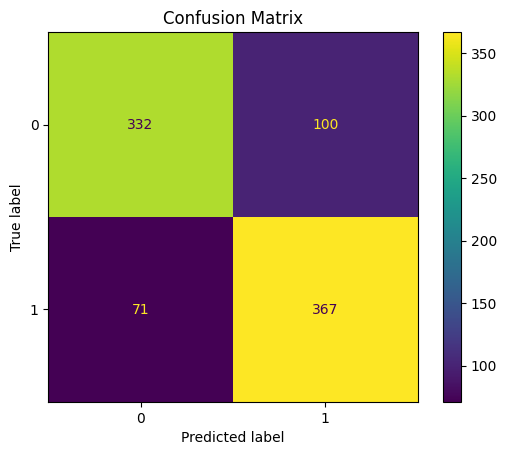

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


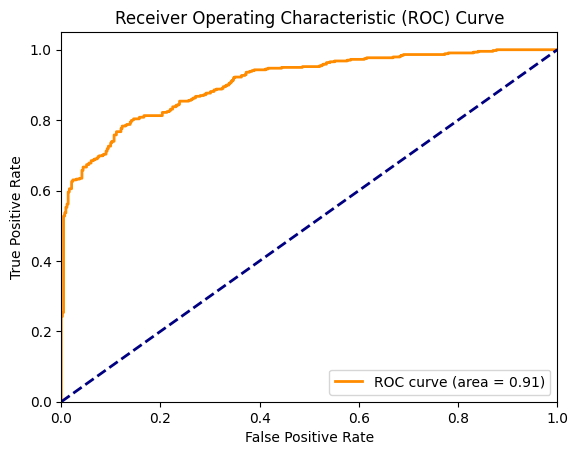

In [ ]:
#Visualisasi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Memuat data
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)

# Standarisasi data
scaler = StandardScaler()
X_df_scaled = scaler.fit_transform(X_df)
X_submission_scaled = scaler.transform(X_submission)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Mengubah target menjadi 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

# Membuat pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LGBMClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [500],
    'classifier__max_depth': [10],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [1]
}

# Menggunakan StratifiedKFold untuk handling imbalanced data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Membuat GridSearchCV dengan cv yang lebih robust
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Prediksi menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Bring the Data In

In [ ]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi train dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
# Mengubah target menjadi 1D array
y_train = y_train['Transported'].values
y_test = y_val['Transported'].values

# Model Training

In [ ]:

# Membuat pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LGBMClassifier(random_state=42))
])



param_grid = {
    'classifier__n_estimators': [500],
    'classifier__max_depth': [10],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [1]
}

# Menggunakan StratifiedKFold untuk handling imbalanced data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
# Membuat GridSearchCV dengan cv yang lebih robust
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3150, number of negative: 3108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2126
[LightGBM] [Info] Number of data points in the train set: 6258, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503356 -> initscore=0.013423
[LightGBM] [Info] Start training from score 0.013423
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=3

In [ ]:
# Menggunakan estimator terbaik untuk prediksi pada data test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Evaluasi model pada data test
print("Accuracy on test set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Fit the model on all training data
grid_search.fit(X_df, y_df)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy on test set: 0.7993099482461185
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       861
           1       0.79      0.82      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

Confusion Matrix:
 [[671 190]
 [159 719]]
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        LGBMClassifier(random_state=42))]),
             param_grid={'classifier__colsample_bytree': [1],
                         'classifier__learning_rate': [0.01],
                         'classifier__max_depth': [10],
                         'classifier__n_estimators': [500],
                         'classifier__subsample': [0.8]},
             scoring='accuracy', verbose=1)

# Submission Prediction

In [ ]:
# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
grid_search.fit(X_df, y_df['Transported'].values)
# Prediksi data submission
y_prediction = grid_search.predict(X_submission)
print(y_prediction)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2126
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=3

In [ ]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [ ]:
submission_dict.to_csv('spaceship_lightgbm6.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>